<a href="https://colab.research.google.com/github/Amulya-Anurag/Pokemon-Dataset/blob/master/Pokemon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Relevent libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Load The DataSet


In [2]:
df= pd.read_csv('/content/Pokemon.csv')
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [3]:
df=df.drop('#',axis=1)
df.isna().sum()

Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

A lot of null values in TYPE 2

In [4]:
#Create a check point with dropping Type2 
df1=df.drop('Type 2',axis=1)
# Rearrange the column name for convenience 

df1.columns= ['Name', 'Type1', 'Total', 'HP', 'Attack', 'Defense',
       'SpAtk', 'SpDef', 'Speed', 'Generation', 'Legendary']

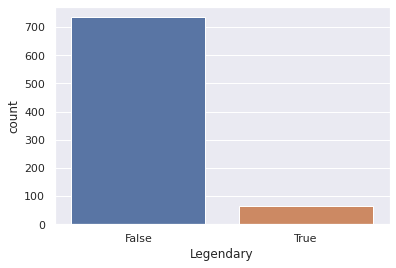

In [5]:
#lets check target values
sns.countplot(df.Legendary)
#This count shows the dataset is highly unbalnced

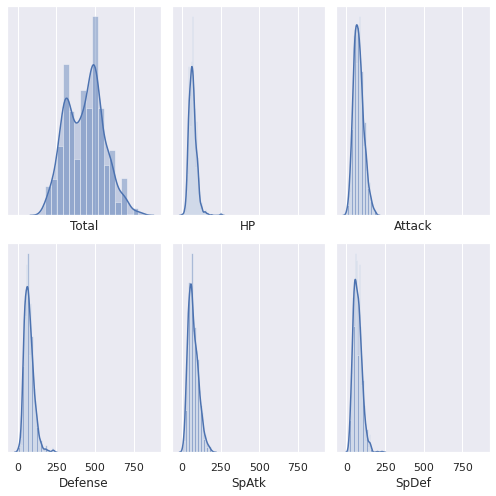

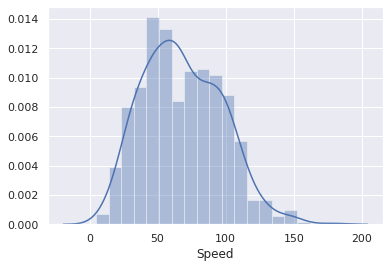

In [6]:
fig,axes=plt.subplots(2, 3, figsize=(7, 7), sharex=True)
for i in range(6):

  sns.distplot(df1[df1.columns[2+i]],ax=axes[i//3,i%3],color="b", kde_kws={"shade": True})

  plt.setp(axes, yticks=[])
  plt.tight_layout()
plt.show()

sns.distplot(df.Speed)
plt.show()

In [7]:
#Re organise the columns for convenience and create a checkpoint

df1=df1[['Name', 'Type1', 'Generation','Total','HP', 'Attack', 'Defense', 'SpAtk',
       'SpDef', 'Speed', 'Legendary']]
df2=df1.drop('Name',axis=1)

Let's Encode the Categorical Features


In [8]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df2['Type1']= le.fit_transform(df2['Type1']) 
df2['Legendary']= le.fit_transform(df2['Legendary']) 

#checkpoint 
df3=df2.copy()

In [9]:
#Classify inputs and targets
inputs= df3.drop('Legendary',axis=1)
targets=df3.Legendary

In [10]:
# Seggregate data into train and test data
from sklearn.model_selection import train_test_split as tts
xtrain,xtest,ytrain,ytest=tts(inputs,targets,random_state=400)

Import the classifiers

In [11]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.ensemble import AdaBoostClassifier as ABC
from sklearn.ensemble import  GradientBoostingClassifier as GBC
from sklearn.metrics import classification_report as CR, confusion_matrix as CM

Define a function for Classification

In [12]:
def get_score(model,xtrain,xtest,ytrain,ytest):
  reg=model
  reg.fit(xtrain,ytrain)
  ypred=reg.predict(xtest)
  sns.heatmap(CM(ytest,ypred),annot=True,fmt="d")
  plt.show()
  print(CR(ytest,ypred))


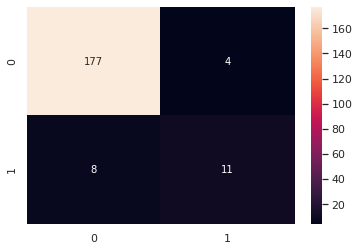

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       181
           1       0.73      0.58      0.65        19

    accuracy                           0.94       200
   macro avg       0.85      0.78      0.81       200
weighted avg       0.94      0.94      0.94       200



In [13]:
get_score(LR(max_iter=1000),xtrain,xtest,ytrain,ytest)
# accuracy is 94% But recall of 1 is very poors

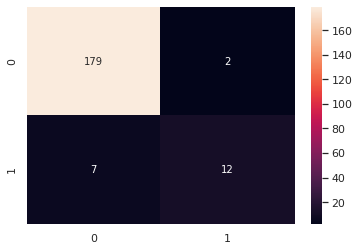

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       181
           1       0.86      0.63      0.73        19

    accuracy                           0.95       200
   macro avg       0.91      0.81      0.85       200
weighted avg       0.95      0.95      0.95       200



In [14]:
get_score(RFC(n_estimators=150),xtrain,xtest,ytrain,ytest)
# accuracy is 95% But recall of 1 is very poor

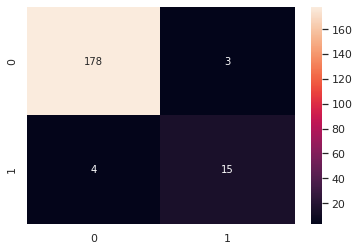

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       181
           1       0.83      0.79      0.81        19

    accuracy                           0.96       200
   macro avg       0.91      0.89      0.90       200
weighted avg       0.96      0.96      0.96       200



In [15]:
get_score(ABC(n_estimators=150,learning_rate=0.2),xtrain,xtest,ytrain,ytest)
# accuracy is 96% But recall of 1 is around 79%

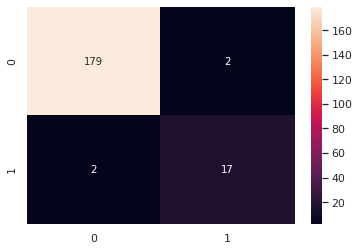

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       181
           1       0.89      0.89      0.89        19

    accuracy                           0.98       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.98      0.98      0.98       200



In [16]:
get_score(GBC(n_estimators=100,learning_rate=0.3),xtrain,xtest,ytrain,ytest)
# accuracy is 98% and Recall of 1 is also very good and also the precision. This is the best model so far

Over Populate the data for improving the model

In [17]:
from imblearn.over_sampling import SMOTENC
sm=SMOTENC(categorical_features=[0,1])
xtrain1,ytrain1=sm.fit_resample(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/loca

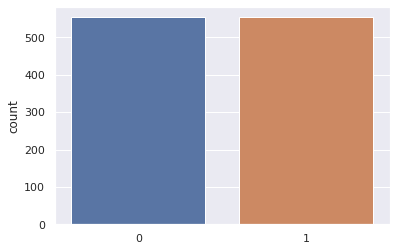

In [18]:
#lets check the new train data
sns.countplot(ytrain1)
plt.show()
#So the data set is balanced

Apply the classifer with populated dataset

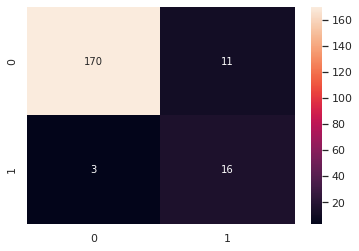

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       181
           1       0.59      0.84      0.70        19

    accuracy                           0.93       200
   macro avg       0.79      0.89      0.83       200
weighted avg       0.95      0.93      0.94       200



In [19]:
get_score(LR(max_iter=1000),xtrain1,xtest,ytrain1,ytest)
# accuracy is 93% and 1's recall becomes 83%

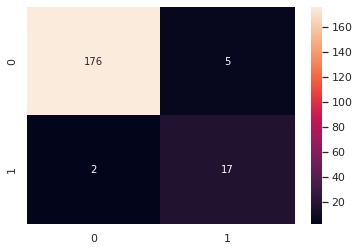

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       181
           1       0.77      0.89      0.83        19

    accuracy                           0.96       200
   macro avg       0.88      0.93      0.90       200
weighted avg       0.97      0.96      0.97       200



In [26]:
get_score(RFC(n_estimators=120),xtrain1,xtest,ytrain1,ytest)
# accuracy is 96% and 1s' recall becomes 89% and precision is also good

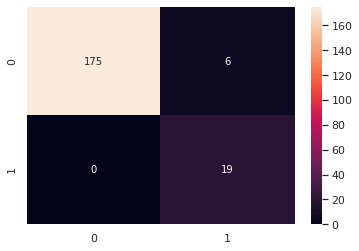

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       181
           1       0.76      1.00      0.86        19

    accuracy                           0.97       200
   macro avg       0.88      0.98      0.92       200
weighted avg       0.98      0.97      0.97       200



In [21]:
get_score(ABC(n_estimators=100,learning_rate=0.1),xtrain1,xtest,ytrain1,ytest)
# accuracy is 97% and 1's recall becomes 100% and precision is also good

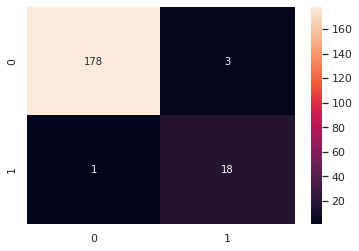

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       181
           1       0.86      0.95      0.90        19

    accuracy                           0.98       200
   macro avg       0.93      0.97      0.94       200
weighted avg       0.98      0.98      0.98       200



In [35]:
get_score(GBC(n_estimators=150,learning_rate=.08),xtrain1,xtest,ytrain1,ytest)
# accuracy is 98% and 1's recall becomes 95% and precision is also  very good

Considering the trade-off between the Recall and Precision, Gradient Boost Classifier is supirior one, and should be final one